# Final Assignment Machine Learning

## Introduction

Below 2 cases are shortly presented. 

The first case has a small amount of data and is fairly easy, and the second case is of intermediate level.

For this final assignment you should work out both cases. Every case can be considered as a typical classification problem. The data of both cases is available on the UCI website. Both cases have labels.

For each case the following should be done:
+ Formulate the question are you trying the answer?
+ Clearly describe the problem that you want to solve.
+ What are the features and labels to start with, motivate your choices (e.g. based on literature).
+ Make a description of the dataset.
+ Find out which are the most important features, should you add and remove features?
+ Show how far can you go with K-means clustering?
+ Apply different classification algorithms, vary the values of the most important parameters, play with the number of features and keep records of algo scores. 
+ Motivate your choices, and of course, support your research journey with appealing and informative graphs and diagrams.

In [13]:
#standard shit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

## Case 1 - Wine Quality

**Data Set Information**

The data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 

See: [UCI Wine](http://archive.ics.uci.edu/ml/datasets/Wine)

In [4]:
#lets see what the database looks like
df = pd.read_csv('data/wine.csv');
df.head()

,Cultivar,Alchohol,Malic Acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## description
a wine tasters dream very likely, contains allot of information avout the wine.
Perhaps we should look for corrolations?

In [9]:
#lets see what df describe has for us.
df.describe()

,Cultivar,Alchohol,Malic Acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## let's make a heat map of corrolations
this one is a shameless copy from regression assignment
which turned out to be very hard to read... i could find something interesting tough.
There seems to be a corrolation between Flavanoids and total Phenols.
it's a pretty high percentage aswell

C:\Users\stefan\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


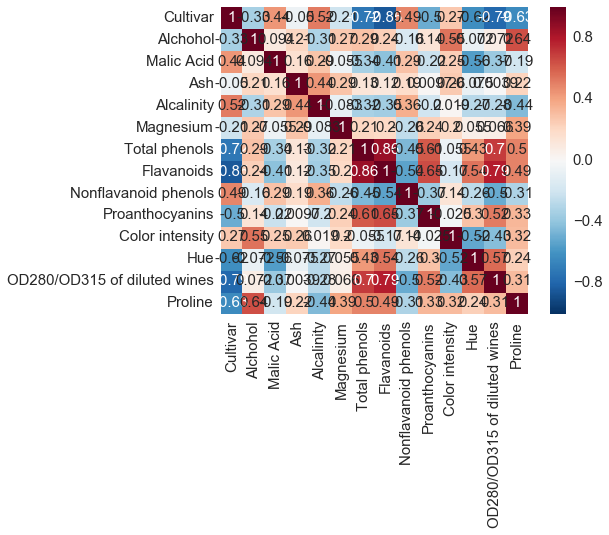

In [12]:
cm = np.corrcoef(df[df.columns.values].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=df.columns.values,
    xticklabels=df.columns.values)
plt.show()

experiment with different algorithms

In [14]:
# Build a decision tree
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns.tolist()[1::]], df['Cultivar'], test_size=0.25, random_state=22)

X_train.shape, y_train.shape

((133, 13), (133,))

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.822 



In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=5)
clf = clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.956 



In [20]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.578 



## closure

i've tried three algorithms, and suprisingly enough Random forest has the best performance.
let's see how well predicting works.

In [23]:
clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=5) #after 100 accuracy doesn't improve for estimator...
clf = clf.fit(X_train, y_train)
prediction =[14.29,0,0,0,0,1.80,0,0,1.41,7.3,0,0,1];

print('This wine belongs to: ' + str(clf.predict(prediction)[0]))

This wine belongs to: 3


C:\Users\stefan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Case 2 - Heart Disease

**Data Set Information**

A number of attributes are listed that possibly influence heart diseases. The presence of heart disease in the patient is an integer valued from 0 (no presence) to 4. 

The names and social security numbers of the patients were recently removed from the database, and replaced with dummy values. 

One file has been "processed", i.e. the Cleveland database (use this one!). 

See: [UCI Heart Disease](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)

# dataset info
As with the previous assignment, let's first see what this dataset has in store for us.
Note to the examinator: I looked into this dataset before, because of this i'm aware of the booby trap ;).

In [32]:
#lets see what the database looks like
df = pd.read_csv('data/heartdisease.csv');
df.head()

,age,sex,chest pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# description
lets see some juicy statistics

In [33]:
#lets see what df describe has for us.
df.describe()

,age,sex,chest pain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [34]:
# By doing this i can see there are objects in the database that shouldn't be there.
df.dtypes

age           float64
sex           float64
chest pain    float64
trestbps      float64
chol          float64
fbs           float64
restecg       float64
thalach       float64
exang         float64
oldpeak       float64
slope         float64
ca             object
thal           object
num             int64
dtype: object

In [35]:
#probably not the best way to clean data, but hey it's not GCD is it?
df.replace({'?': 0}, inplace=True)
df[['ca', 'thal']] = df[['ca', 'thal']].astype(float)

# what alogorthm shall we use?

In [36]:
# Build a decision tree
from sklearn.cross_validation import train_test_split
columns =['age', 'sex', 'chest pain', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_train, X_test, y_train, y_test = train_test_split(df[columns], df['num'], test_size=0.25, random_state=22)

X_train.shape, y_train.shape

((227, 13), (227,))

In [37]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.618 



In [94]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=5)
clf = clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.645 



In [39]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.184 



wel... that didn't go as planned, i did some web surfing to find a algorithm that might fit the bill.

tried some algorithms in this list: http://scikit-learn.org/stable/supervised_learning.html

In [42]:
#i had forgotten this one.
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.579 



In [67]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)  

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.618 



In [52]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train) 
clf.decision_function_shape = "ovr"

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.579 



In [68]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train) 

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.592 



In [69]:
from sklearn.naive_bayes import BernoulliNB

clf = MultinomialNB()
clf.fit(X_train, y_train) 

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.592 



In [89]:
from sklearn.ensemble import GradientBoostingClassifier

#tried to play with the parameters, got from 0.533 to the current value
clf =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=5)
clf.fit(X_train, y_train) 

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.579 



# closure
i'm not sure what i'm missing, but i'm going to use the highest accuracy i could find,
Which again is the random tree.
i'm not very confident in my answer in this one.

In [98]:
clf = RandomForestClassifier(n_estimators=100,max_depth=3,max_features=5)
clf = clf.fit(X_train, y_train)

prediction = [ 62,1, 2,160, 286, 0, 2, 108, 1, 1.5, 2, 3.1, 3.1]

#if 0 then he/she has no haert disease
print('patient has disease: ' + str(clf.predict(prediction)[0]))

patient has disease: 0


C:\Users\stefan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Goodluck